In [2]:
import numpy as np

# Quelques opérations matricielles

**Question** Create the following matrix `A` with `arange` and `reshape`

    array([[0, 1],
           [2, 3],
           [4, 5],
           [6, 7],
           [8, 9]])

In [3]:
A = np.arange(10).reshape((5,2))
A

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

**Question** Calculate `A + A` , `A*2`, `A**2`. 

In [4]:
print(A+A)
print('-----------------------')
print(A*2)
print('-----------------------')
print(A**2)

[[ 0  2]
 [ 4  6]
 [ 8 10]
 [12 14]
 [16 18]]
-----------------------
[[ 0  2]
 [ 4  6]
 [ 8 10]
 [12 14]
 [16 18]]
-----------------------
[[ 0  1]
 [ 4  9]
 [16 25]
 [36 49]
 [64 81]]


**Question** Describe the operations.  

This kind of operations on matrix apply simples operation on each elements of the matrix

## A first example of broadcasting

**Question** Create an 1D-array numpy `v1t` containing two values `1` and `2`.

In [5]:
v1t = np.array([1,2])
v1t

array([1, 2])

**Question** Calculate `A+v1t` and interpret the result? 

In [6]:
print(A+v1t)

[[ 1  3]
 [ 3  5]
 [ 5  7]
 [ 7  9]
 [ 9 11]]


This apply an addition on the firsts elements of the biggest matrix, the rest stay as they are

**Question** Create`v2`, a matrix of 5 rows and 1 column containing numbers from 0 to 4.

In [7]:
v2 = np.arange(5).reshape(5, 1)
v2

array([[0],
       [1],
       [2],
       [3],
       [4]])

**Question** Calculate `A+v2` and explain the result? 

In [8]:
print(A+v2)

[[ 0  1]
 [ 3  4]
 [ 6  7]
 [ 9 10]
 [12 13]]


This operation add v2[i] at A[i] for each i

## 1d-arrays, nd-arrays and transpose

**Question** Give the names `v3t` and `v4t` to the first two columns of `A`. 

In [9]:
v3t = A[:, 0]
v4t = A[:, 1]
v3t

array([0, 2, 4, 6, 8])

**Question** Do you obtain columns?

no, I obtain a list of element that compose the colomn

**Note** 
- Every numpy array has an attribute `T` which corresponds to the transpose view of the array. 
- Be careful! 1d-arrays and nd-arrays have different behavior... 
- Note that the number of square brackets pairs`[]` shows the number of axes.

**Question** Observe the transpose of `A`, `v1t` and `v2`.

In [10]:
print(A.T)
print(v1t.T)
print(v2.T)

[[0 2 4 6 8]
 [1 3 5 7 9]]
[1 2]
[[0 1 2 3 4]]


**Question** Interpret the results. 

*Answer*: the transpose of a 1D array is unchanged, it s the same as the matrix not transposed

# Matrix multiplications

The matrix multiplication $A$ times $B$ is defined when the number of columns in $A$ equals the number of rows in  $B$. If $A$'s shape is $(n,m)$ and $B$'shape is $(m,p)$ then $C=AB$ has  shape $(n,p)$ and $$C_{i,j} = \sum_{k=1}^m A_{i,k}\times B_{k,j}$$

**Note** Matrix multiplication can be done in several ways in numpy:

In [11]:
C = np.dot(A, A.T)
C = A @ A.T
C = A.dot(A.T)
C

array([[  1,   3,   5,   7,   9],
       [  3,  13,  23,  33,  43],
       [  5,  23,  41,  59,  77],
       [  7,  33,  59,  85, 111],
       [  9,  43,  77, 111, 145]])

**Question** Calculate $v_2^\top A$ and $A^\top v_2$

In [12]:
print(v2.T @ A)
print(A.T @ v2)

[[60 70]]
[[60]
 [70]]


**Note** Using the class `np.random.RandomState`, you can create instances to generate pseudo random numbers. You can fix the seed in the instance creation. 

In [13]:
rs = np.random.RandomState(42)

**Question** Create 3x3 matrices `A`, `B` and `C` containing random numbers between 0 and 9.


In [14]:
A = rs.randint(0, 10, size=(3, 3))
B = rs.randint(0, 10, size=(3, 3))
C = rs.randint(0, 10, size=(3, 3))
print(A)
print(B)
print(C)

[[6 3 7]
 [4 6 9]
 [2 6 7]]
[[4 3 7]
 [7 2 5]
 [4 1 7]]
[[5 1 4]
 [0 9 5]
 [8 0 9]]


**Question** Calculate $AB$, $BA$, $A^\top B^\top$, $(BA)^\top$

In [15]:
AB = A@B
BA = B@A
A_T_B_T = A.T @ B.T
BA_T = (B@A).T
print(AB)
print()
print(BA)
print()
print(A_T_B_T)
print()
print(BA_T)

[[ 73  31 106]
 [ 94  33 121]
 [ 78  25  93]]

[[ 50  72 104]
 [ 60  63 102]
 [ 42  60  86]]

[[ 50  60  42]
 [ 72  63  60]
 [104 102  86]]

[[ 50  60  42]
 [ 72  63  60]
 [104 102  86]]


**Question** Give the identities and the differences.

*Answer*: (B @ A).T = A.T @ B.T

A@B != B@A

**Question** Calculate $(AB)C$, $A(BC)$, $A(B+C)$, $AB+AC$

In [16]:
AB_C = (A@B) @ C
A_BC = A @ (B@C)
A_B_plus_C = A @ (B + C)
AB_plus_AC = (A@B) + (A@C)

print(AB_C)
print()
print(A_BC)
print()
print(A_B_plus_C)
print()
print(AB_plus_AC)

[[1213  352 1401]
 [1438  391 1630]
 [1134  303 1274]]

[[1213  352 1401]
 [1438  391 1630]
 [1134  303 1274]]

[[159  64 208]
 [186  91 248]
 [144  81 194]]

[[159  64 208]
 [186  91 248]
 [144  81 194]]


**Question** Give the identities.

*Answer*:

(A@B) @ C = A @ (B@C)

A @ (B + C) = (A@B) + (A@C)

## Scalar product

The scalar product of two vectors of size  $n$ is $$\langle u,v \rangle= \sum_{i=1}^n u_i\times v_i=u^\top v$$


**Question** Create 2 1d-array `v1t` and `v2t` of size 4 of random numbers in the interval $[-9, 10)$ (10 is excluded)

In [17]:
v1t = rs.randint(-9, 10, size=4)
v2t = rs.randint(-9, 10, size=4)
print(v1t)
print(v2t)

[6 5 5 9]
[ 2 -7 -5  9]


**Question** Calculate `v1t@v2t`, `v2t@v1t` and conclude 

In [18]:
print(v1t @ v2t)
print(v2t @ v1t)

33
33


*Answer*: for a 1D array, this calcul is commutative and possible

**Question** With `reshape` or `newaxis`, create 4x1 matrices  `v1` and `v2` from `v1t` and `v2t`.

In [19]:
v1 = v1t.reshape(4, 1)
v2 = v2t[:, np.newaxis]
print(v1.T @ v2)

[[33]]


**Question** Now calculate `v1@v2` and `v2@v1`. Conclusion!

*Answer*: thsi calcul is not possible due to the 2D, matrice 1 have not the same number of column than the 2nd have lines

**Question** Calculate the scalar product using `v1.T` and `v2`. Is the result a scalar?

*Answer*: in fact, the result is a 2D matrice, but it only contains 1 element, so it can be considered as an unic value

## Norms (Important)

The $p$-norm of $v$ is defined by $$\Vert v \Vert_p=\big(\sum_{i=1}^n |x_i|^p\big)^{\frac{1}{p}}$$
We often compute the 2-norm and this is the default when $p$ is not given.
$$\Vert v \Vert=\sqrt{\big(\sum_{i=1}^n |x_i|^2\big)}$$
See the doc of `np.linalg.norm`.  

**Question** What is the norm of `v1`.

In [20]:
v1_norm = np.linalg.norm(v1)
v1_norm

np.float64(12.922847983320086)

**Question** From the previous definitions we have $\langle v,v\rangle = \Vert v\Vert^2$. Double check with `v1`

In [21]:
print((v1.T@v1))
print(np.linalg.norm(v1)**2)

[[167]]
167.0


**Question** The norm is like a distance between the extreme points of the vector. It satisfies the triangular inequality: $\Vert u+v\Vert \leq \Vert u\Vert + \Vert v \Vert$. Check the inquality with `v1`and `v2`.

In [22]:
print(np.linalg.norm(v1))
print(np.linalg.norm(v2))
print(np.linalg.norm(v1 + v2))

12.922847983320086
12.609520212918492
19.79898987322333


**Question** Reading the documentation of `np.linalg.norm`, you have learned that the computation is different when the function is applied on 1d-arrays and nd-arrays. Calculate $p$-norms for $p=1$ and $p=\infty$ on `v1t` using `np.linalg.norm`. Do the same computation with numpy but without this function in order to check that you have perfectly understood what the function is doing on different kind of arrays. (`np.Inf` is $+\infty$)

In [23]:
print(np.linalg.norm(v1t, ord=1))
print(np.linalg.norm(v1t, ord=np.inf))

25.0
9.0


**Question** Now on $A$, what are the  1-norm, the $\infty$-norm and the Froebenius norm?

In [24]:
print(np.linalg.norm(A, ord=1))
print(np.linalg.norm(A, ord=np.inf))
print(np.linalg.norm(A, ord='fro'))


23.0
19.0
17.776388834631177


# Solving a system of linear equations

We want to solve $$\left \{ \begin{array}{ll}x_2 = 3 x_1\\x_2 = -x_1 +3\end{array} \right .$$

Each equation define a set of points of coordinates $(x_1,x_2)$ by a linear relation between $x_1$ and $x_2$. The conjunction of the 2 equations is therefore the intersection between the 2 sets. We can draw the corresponding graph:

**Question** Draw the two lines 

$$\left \{ \begin{array}{l}x_2 = 3 x_1\\x_2 = -x_1 +3\end{array} \right .$$ 

for $x_2$ in $[0, 3]$. It should be like this:

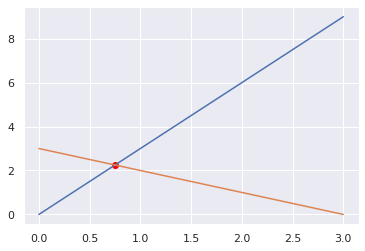

Use `plot` for the lines and  `scatter` for the dot at the intersection (compute the value by hand!). 

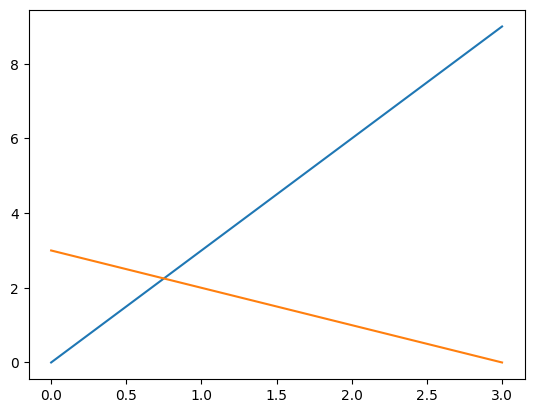

In [25]:
import matplotlib.pyplot as plt
x1 = np.linspace(0, 3, 100)
x2_line1 = 3 * x1
x2_line2 = -x1 + 3
plt.plot(x1, x2_line1)
plt.plot(x1, x2_line2)

**Question** Rewrite the system

$$\left \{ \begin{array}{l}x_2 = 3 x_1\\x_2 = -x_1 +3\end{array} \right .$$ 

under the form $Ax = b$ where $x$ is a (columnwise) vector $(x_1,x_2)$. Create $A$ and $b$.

In [28]:
A = np.array([[-3, 1],
              [ 1, 1]])
b = np.array([0, 3])
print(A)
print(b)

[[-3  1]
 [ 1  1]]
[0 3]


**Question** Calculate $Ax$ for the column vector $(1, 1)^T$

In [29]:
x = np.array([[1],
              [1]])
Ax = A @ x
print(Ax)

[[-2]
 [ 2]]


**Question** With `np.linalg.inv`, name `Ainv` the matrix inverse of $A$.

In [31]:
Ainv = np.linalg.inv(A)
Ainv

array([[-0.25,  0.25],
       [ 0.25,  0.75]])

**Question** Calculate the product of `Ainv` by `A`. Conclusion 

In [32]:
print (Ainv@A)

[[1. 0.]
 [0. 1.]]


*Answer*: Ainv * A is a unitary vector

**Question** Calculate $x= A^{-1}b$ and then $Ax$. Conclusion. 

In [34]:
x = Ainv @ b 
print(x)
print(A @ x)

[0.75 2.25]
[0. 3.]


*Answer*: we can find the solution thanks to Ainv@b

**Questions** Using the geometrical interpretation of what we did, define 2 systems for which the intersection of the 2 equations is either null or not a single point. What can you say about $A^{-1}$ in these cases? 

In [ ]:
A = np.array([[-3, 1],
              [-3, 1]])
np.linalg.inv(A)

LinAlgError: Singular matrix

*Answer*: the inverse of matrice A don t exist, the np.linalg.inv(A) return an error

**Note** Everything extends to the case where the number of equations/variables is greater than 2!